# Kerasの基礎
RNNのコードを学ぶ前に、Kerasの基礎をおさえておきましょう。

## 学習用のデータを用意
今回は、Kerasに慣れるためにシンプルな学習用のデータを用意します。  
正解を、サイン関数の値とします。

[[-3.14159265]
 [-3.01336438]
 [-2.88513611]
 [-2.75690784]
 [-2.62867957]
 [-2.5004513 ]
 [-2.37222302]
 [-2.24399475]
 [-2.11576648]
 [-1.98753821]
 [-1.85930994]
 [-1.73108167]
 [-1.60285339]
 [-1.47462512]
 [-1.34639685]
 [-1.21816858]
 [-1.08994031]
 [-0.96171204]
 [-0.83348377]
 [-0.70525549]
 [-0.57702722]
 [-0.44879895]
 [-0.32057068]
 [-0.19234241]
 [-0.06411414]
 [ 0.06411414]
 [ 0.19234241]
 [ 0.32057068]
 [ 0.44879895]
 [ 0.57702722]
 [ 0.70525549]
 [ 0.83348377]
 [ 0.96171204]
 [ 1.08994031]
 [ 1.21816858]
 [ 1.34639685]
 [ 1.47462512]
 [ 1.60285339]
 [ 1.73108167]
 [ 1.85930994]
 [ 1.98753821]
 [ 2.11576648]
 [ 2.24399475]
 [ 2.37222302]
 [ 2.5004513 ]
 [ 2.62867957]
 [ 2.75690784]
 [ 2.88513611]
 [ 3.01336438]
 [ 3.14159265]]


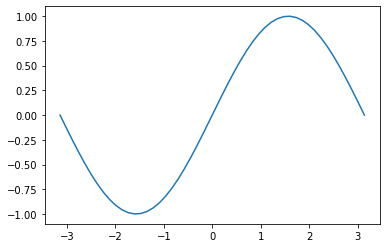

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# reshapeは配列の形状を変更できる。引数に-1を指定すると、自動で行や列の数が決まる。
x = np.linspace(-np.pi, np.pi).reshape(-1, 1)  # -πからπまで 
t = np.sin(x)  # sin関数

print(x)

plt.plot(x, t)
plt.show()

## ニューラルネットワークの構築
Kerasを使ってニューラルネットワークを構築します。  
Sequential()によりモデルを作成し、addメソッドにより層を追加します。  
Dense()により、通常の層を作ることができます。  

In [2]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8  # バッチサイズ
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

# 入力層、中間層、出力層の３層のニューラルネットワークを構築
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))  # 活性化関数にシグモイド関数
model.add(Dense(n_out, activation="linear"))  # 活性化関数に恒等関数
model.compile(loss="mean_squared_error", optimizer="sgd")  # 損失関数に二乗誤差、最適化アルゴリズムにSGDを使用してコンパイル
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


## 学習
構築したモデルを使って、学習を行います。  
学習にはモデルオブジェクトのfit()メソッドを使います。

In [3]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1)  # 10%のデータを検証用に使う

Epoch 1/2000
6/6 [==============================] - 1s 27ms/step - loss: 0.9678 - val_loss: 0.0683
Epoch 2/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.7091 - val_loss: 0.0765
Epoch 3/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.5957 - val_loss: 0.0607
Epoch 4/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.5202 - val_loss: 0.0569
Epoch 5/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.4656 - val_loss: 0.0523
Epoch 6/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.4223 - val_loss: 0.0386
Epoch 7/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.3874 - val_loss: 0.0343
Epoch 8/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.3466 - val_loss: 0.0398
Epoch 9/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.3176 - val_loss: 0.0528
Epoch 10/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.2945 - val_loss: 0.0758
Epoch 11/2000
6/6 

## 学習の推移
fit()メソッドが返すオブジェクトを使って、学習の記録を後から確認することができます。

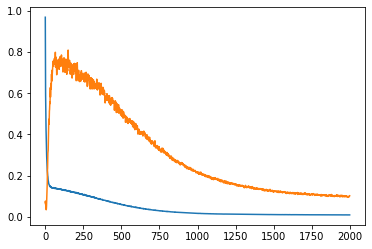

In [4]:
loss = history.history['loss']  # 訓練用データの誤差
vloss = history.history['val_loss']  # 検証用データの誤差

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

## 学習済みモデルの使用
predict()メソッドにより、学習済みモデルを使用し予測を行うことができます。

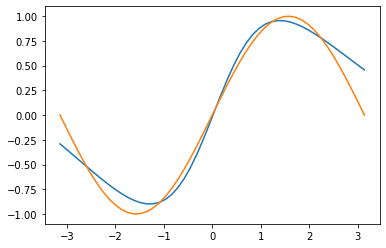

In [5]:
plt.plot(x, model.predict(x))  # モデルを使用し予測を行う
plt.plot(x, t)
plt.show()

モデルがサイン関数を学習していることが確認できました。  

Kerasについて、さらに詳しく知りたい方はこちらの公式ドキュメントを参考にしてください。  
https://keras.io/ja/  

## 課題
Kerasでニューラルネットワークを構築し、モデルにコサイン関数を学習させてみましょう。

[[-3.14159265]
 [-3.01336438]
 [-2.88513611]
 [-2.75690784]
 [-2.62867957]
 [-2.5004513 ]
 [-2.37222302]
 [-2.24399475]
 [-2.11576648]
 [-1.98753821]
 [-1.85930994]
 [-1.73108167]
 [-1.60285339]
 [-1.47462512]
 [-1.34639685]
 [-1.21816858]
 [-1.08994031]
 [-0.96171204]
 [-0.83348377]
 [-0.70525549]
 [-0.57702722]
 [-0.44879895]
 [-0.32057068]
 [-0.19234241]
 [-0.06411414]
 [ 0.06411414]
 [ 0.19234241]
 [ 0.32057068]
 [ 0.44879895]
 [ 0.57702722]
 [ 0.70525549]
 [ 0.83348377]
 [ 0.96171204]
 [ 1.08994031]
 [ 1.21816858]
 [ 1.34639685]
 [ 1.47462512]
 [ 1.60285339]
 [ 1.73108167]
 [ 1.85930994]
 [ 1.98753821]
 [ 2.11576648]
 [ 2.24399475]
 [ 2.37222302]
 [ 2.5004513 ]
 [ 2.62867957]
 [ 2.75690784]
 [ 2.88513611]
 [ 3.01336438]
 [ 3.14159265]]


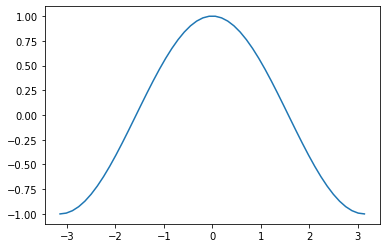

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# reshapeは配列の形状を変更できる。引数に-1を指定すると、自動で行や列の数が決まる。
x = np.linspace(-np.pi, np.pi).reshape(-1, 1)  # -πからπまで 
t = np.cos(x)  # sin関数

print(x)

plt.plot(x, t)
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8  # バッチサイズ
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

# 入力層、中間層、出力層の３層のニューラルネットワークを構築
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))  # 活性化関数にシグモイド関数
model.add(Dense(n_out, activation="linear"))  # 活性化関数に恒等関数
model.compile(loss="mean_squared_error", optimizer="sgd")  # 損失関数に二乗誤差、最適化アルゴリズムにSGDを使用してコンパイル
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1)  # 10%のデータを検証用に使う

Epoch 1/2000
6/6 [==============================] - 0s 25ms/step - loss: 0.6502 - val_loss: 0.5794
Epoch 2/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.5920 - val_loss: 0.6110
Epoch 3/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.5693 - val_loss: 0.6517
Epoch 4/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.5548 - val_loss: 0.7047
Epoch 5/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.5318 - val_loss: 0.7605
Epoch 6/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.5279 - val_loss: 0.7353
Epoch 7/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.5034 - val_loss: 0.7983
Epoch 8/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.4915 - val_loss: 0.8382
Epoch 9/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.4850 - val_loss: 1.0149
Epoch 10/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.4758 - val_loss: 0.9937
Epoch 11/2000
6/6 

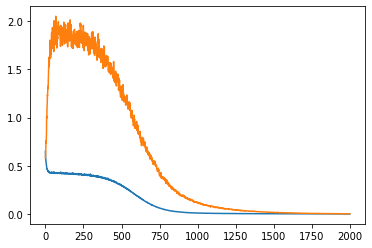

In [9]:
loss = history.history['loss']  # 訓練用データの誤差
vloss = history.history['val_loss']  # 検証用データの誤差

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

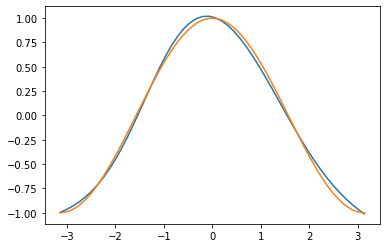

In [10]:
plt.plot(x, model.predict(x))  # モデルを使用し予測を行う
plt.plot(x, t)
plt.show()